# Cluster analysis

In [1]:
"""
1. Define variables to use
2. Define similarity/dissimilarity criterion between entities
3. Define a clustering algorithm to create groups of similar entities
4. Analyse it and validate the resulting solution.
"""

import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt

### Agglomerative

NameError: name 'df_forClus' is not defined

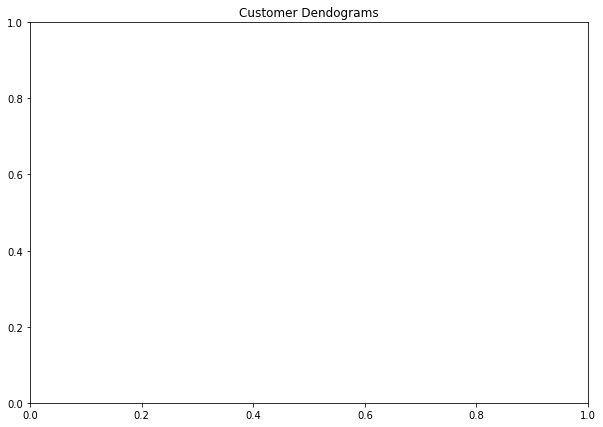

In [2]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(df_forClus, method='ward'))

n_clusters = 5

cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
cluster.fit_predict(df_forClus)

plt.figure(figsize=(10, 7))
plt.scatter(df_forClus.iloc[:,0], df_forClus.iloc[:,1], c=cluster.labels_, cmap='rainbow')

plt.show()

### K-means

In [ ]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,20)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_forClus)
    Sum_of_squared_distances.append(km.inertia_)

# Plot the elbow
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, 
                random_state=0,
                n_init = 10,
                max_iter = 2000).fit(df_forClus)

kmeans_clusters = pd.DataFrame(kmeans.cluster_centers_)

### Silhoutte Analysis

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

#modified code from http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

def silplot(X, clusterer, pointlabels=None):
    cluster_labels = clusterer.labels_
    n_clusters = clusterer.n_clusters
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(11,8.5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters = ", n_clusters,
          ", the average silhouette_score is ", silhouette_avg,".",sep="")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(0,n_clusters+1):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=200, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    xs = X.iloc[:, 0]
    ys = X.iloc[:, 1]
    
    if pointlabels is not None:
        for i in range(len(xs)):
            plt.text(xs[i],ys[i],pointlabels[i])

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % int(i), alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

silplot(df_forClus, kmeans)
plt.show()

### K-modes

In [ ]:
#need to define df_cat with categorical values with no standarisation

from kmodes.kmodes import KModes

VE_Cat = df[['Education', 'Area', 'Children']].astype('str')

for j in list(VE_Cat):
    for i in range(VE_Cat.shape[0]):
        if VE_Cat.loc[i,j] == '':
            VE_Cat.loc[i,j] = 'Missing'

km = KModes(n_clusters = 4, init = 'random', n_init = 50, verbose=1)

kmode_clusters = km.fit_predict(VE_Cat)

cat_centroids = pd.DataFrame(km.cluster_centroids_,
                             columns = ['Education', 'Area', 'Children'])

unique, counts = np.unique(km.labels_, return_counts = True)

cat_counts = pd.DataFrame(np.asarray((unique, counts)).T, columns = ['Label', 'Number'])

cat_centroids = pd.concat([cat_centroids, cat_counts], axis = 1)

### Self Organising Map

In [ ]:
#from sklearn.externals import joblib
import joblib
import random
from sompy.sompy import SOMFactory
from sompy.visualization.plot_tools import plot_hex_map
import logging

names = ['clothes', 'kitchen', 'small_appliances', 'toys', 'house_keeping']

sm = SOMFactory().build(data = X,
               mapsize=(10,10),
               normalization = 'var',
               initialization='random', #'pca'
               component_names=names,
               lattice= 'hexa',
               training = 'seq')#'seq','batch'

sm.train(n_job=4,
         verbose='info',
         train_rough_len=30,
         train_finetune_len=100)


final_clusters = pd.DataFrame(sm._data, columns = names)

my_labels = pd.DataFrame(sm._bmu[0])
    
final_clusters = pd.concat([final_clusters,my_labels], axis = 1)

final_clusters.columns = [*names, 'Labels']

In [ ]:
from sompy.visualization.mapview import View2DPacked
view2D  = View2DPacked(10,10,"", text_size=7)
view2D.show(sm, col_sz=5, what = 'codebook',)#which_dim="all", denormalize=True)
plt.show()

In [ ]:
from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"", text_size=7)
view2D.show(sm, col_sz=5, what = 'codebook',)#which_dim="all", denormalize=True)
plt.show()

In [ ]:
from sompy.visualization.bmuhits import BmuHitsView
vhts  = BmuHitsView(12,12,"Hits Map",text_size=7)
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=10, cmap="autumn", logaritmic=False)

In [ ]:
from sompy.visualization.hitmap import HitMapView
sm.cluster(3)
hits  = HitMapView(10,10,'Clustering', text_size=7)
a=hits.show(sm, labelsize=12)

### Mean-Shift